In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [6]:
df = pd.read_csv("Dataset/data.csv")
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [11]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
df.shape

(569, 31)

In [12]:
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0
    
df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

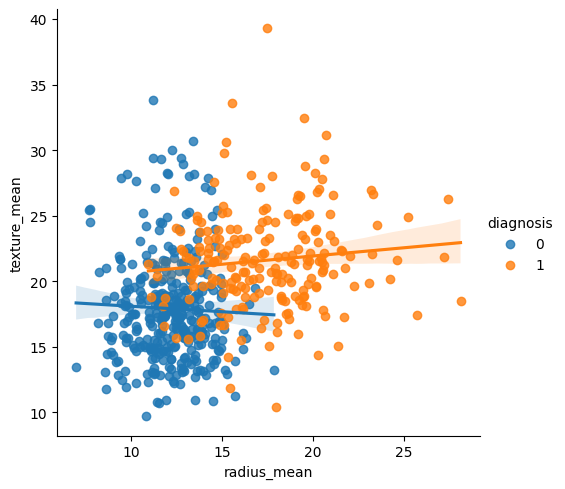

In [14]:
sns.lmplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df)

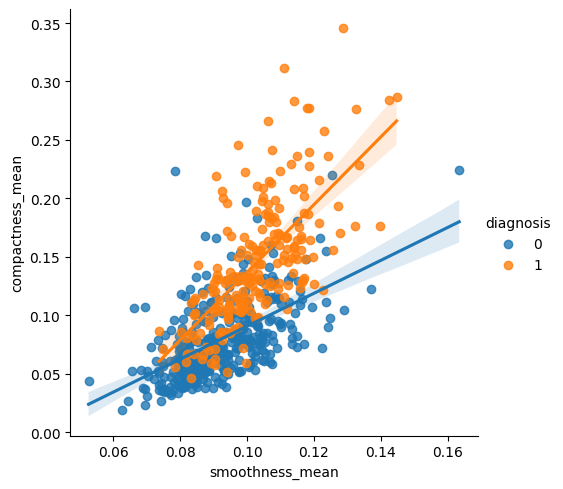

In [15]:
sns.lmplot(x='smoothness_mean', y='compactness_mean', data=df, hue='diagnosis')

In [16]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_train.shape

(381,)

In [23]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [24]:
knn.score(X_test, y_test)

0.9627659574468085

In [25]:
neighbors = []
cv_scores = []
from sklearn.model_selection import cross_val_score
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

13


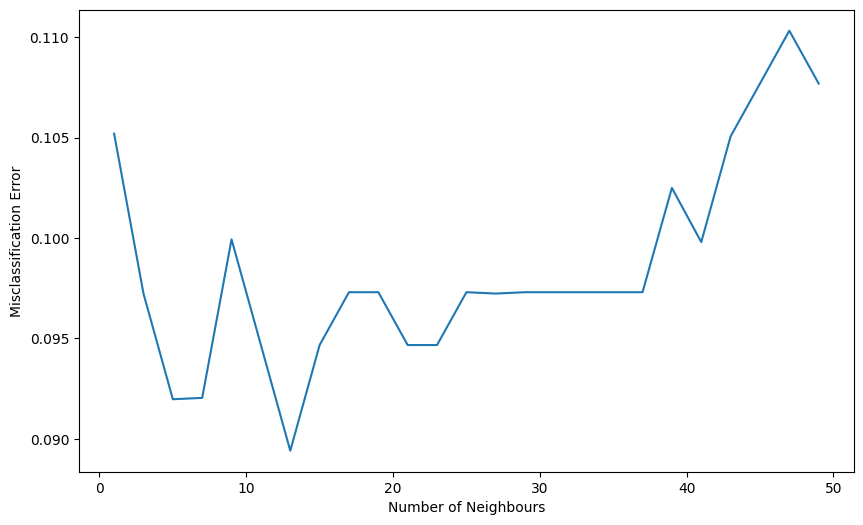

In [26]:
MSE = [1-x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print(optimal_k)
plt.figure(figsize=(10, 6))
plt.plot(neighbors, MSE)
plt.xlabel("Number of Neighbours")
plt.ylabel("Misclassification Error")
plt.show()